# Training stage

<img src="https://user-images.githubusercontent.com/74012107/131382816-40a83670-6dc1-439b-824d-3354279b181a.png" width="1100" height="700">

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [2]:
# Load datasets from the preprocessing stage
data_train = np.load('data_train.npy')
target_train = np.load('target_train.npy')

data_validation = np.load('data_validation.npy')
target_validation = np.load('target_validation.npy')

data_test = np.load('data_test.npy')
target_test = np.load('target_test.npy')

In [3]:
# Make the model
model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape = data_train.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(100, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(100, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [4]:
model.summary() # Provides an overview of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 100)       90100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 100)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 100)       0

In [5]:
history = model.fit(data_train, target_train, epochs = 10, validation_data = (data_validation, target_validation)) 

Epoch 1/10
313/313 [==============================] - 174s 557ms/step - loss: 0.2561 - accuracy: 0.8848 - val_loss: 0.0978 - val_accuracy: 0.9638
Epoch 2/10
313/313 [==============================] - 169s 539ms/step - loss: 0.0987 - accuracy: 0.9681 - val_loss: 0.0566 - val_accuracy: 0.9787
Epoch 3/10
313/313 [==============================] - 195s 623ms/step - loss: 0.0845 - accuracy: 0.9731 - val_loss: 0.0589 - val_accuracy: 0.9787
Epoch 4/10
313/313 [==============================] - 188s 602ms/step - loss: 0.0606 - accuracy: 0.9797 - val_loss: 0.0542 - val_accuracy: 0.9775
Epoch 5/10
313/313 [==============================] - 190s 606ms/step - loss: 0.0523 - accuracy: 0.9816 - val_loss: 0.0417 - val_accuracy: 0.9862
Epoch 6/10
313/313 [==============================] - 190s 607ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.0452 - val_accuracy: 0.9837
Epoch 7/10
313/313 [==============================] - 182s 582ms/step - loss: 0.0448 - accuracy: 0.9842 - val_loss: 0.0338 -

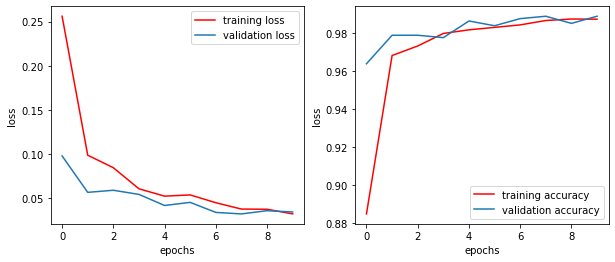

In [6]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'best')

plt.show()

## Evaluate the model

In [7]:
print(model.evaluate(data_test, target_test)) 

31/31 [==============================] - 4s 119ms/step - loss: 0.0353 - accuracy: 0.9869
[0.035341765731573105, 0.9868951439857483]


In [8]:
target_predicted = model.predict(data_test)
target_predicted_classes = np.argmax(target_predicted,axis = 1)
target_test_classes = np.argmax(target_test, axis = 1)

In [9]:
confusion_m = confusion_matrix(target_test_classes,target_predicted_classes)
print('Confusion matrix:\n{}'.format(confusion_m))

Confusion matrix:
[[479   4]
 [  9 500]]


In [10]:
print('Precision score: {}'.format(metrics.precision_score(target_test_classes, target_predicted_classes)))

Precision score: 0.9920634920634921


In [11]:
print('Recall score: {}'.format(metrics.recall_score(target_test_classes, target_predicted_classes)))

Recall score: 0.9823182711198428


In [12]:
print('F1 score: {}'.format(metrics.f1_score(target_test_classes, target_predicted_classes)))

F1 score: 0.9871668311944718


In [13]:
# Classification report
report = classification_report(target_test_classes, target_predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       483
           1       0.99      0.98      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [14]:
# Save the model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
